# Simulate Poisson Process

$$
\begin{align*}
X &\sim \text{Poisson}(\lambda t) \\
Y &\sim \text{Poisson}(\lambda t) \\
Z &= X + Y 
\end{align*}
$$

- $X$ is the number of arrivals in the interval [0, t] in Poisson process with rate of  $\lambda$ arrivals per unit time
- $\lambda$ is the arrival rate measured in arrivals per unit time.

For more information on the Poisson process, you can refer to [Wikipedia](https://en.wikipedia.org/wiki/Poisson_point_process).

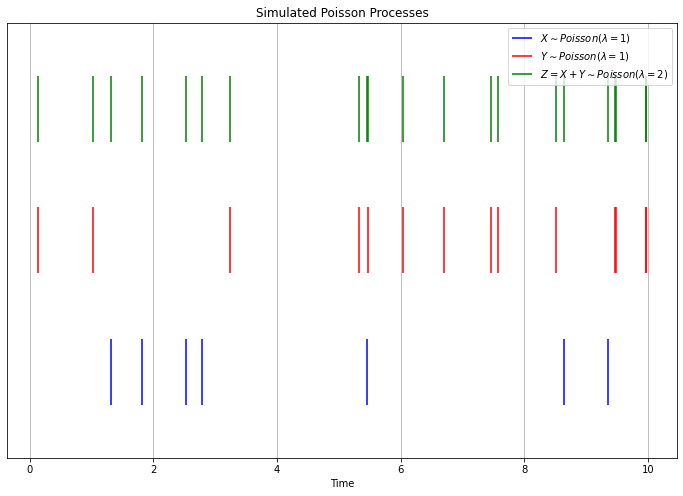

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
lambda_X = 1  # Lambda for Poisson process X
lambda_Y = 1  # Lambda for Poisson process Y
time_interval = 10  # Total time interval for simulation (e.g., 10 time units)

# Simulate Poisson processes X and Y
num_events_X = np.random.poisson(lambda_X * time_interval)
num_events_Y = np.random.poisson(lambda_Y * time_interval)

# Generate random event times for X and Y
event_times_X = np.sort(np.random.uniform(0, time_interval, num_events_X))
event_times_Y = np.sort(np.random.uniform(0, time_interval, num_events_Y))

# Merge the event times and create the merged process
event_times_merged = np.sort(np.concatenate((event_times_X, event_times_Y)))

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Plot Poisson process X in blue
ax.eventplot(event_times_X, lineoffsets=0, linelengths=0.5, color='blue', label='$X\sim Poisson(\lambda={})$'.format(lambda_X))

# Plot Poisson process Y in red
ax.eventplot(event_times_Y, lineoffsets=1, linelengths=0.5, color='red', label='$Y\sim Poisson(\lambda={})$'.format(lambda_Y))

# Plot merged process X+Y in green
ax.eventplot(event_times_merged, lineoffsets=2, linelengths=0.5, color='green', label='$Z=X+Y\sim Poisson(\lambda={})$'.format(lambda_X+lambda_Y))

ax.set_xlabel('Time')
ax.set_title('Simulated Poisson Processes')
ax.legend(loc='upper right')
ax.grid(True)

# Remove y-axis ticks
ax.set_yticks([])

# Display the plot
plt.show()


# Gathering the first arrival times by simulation 

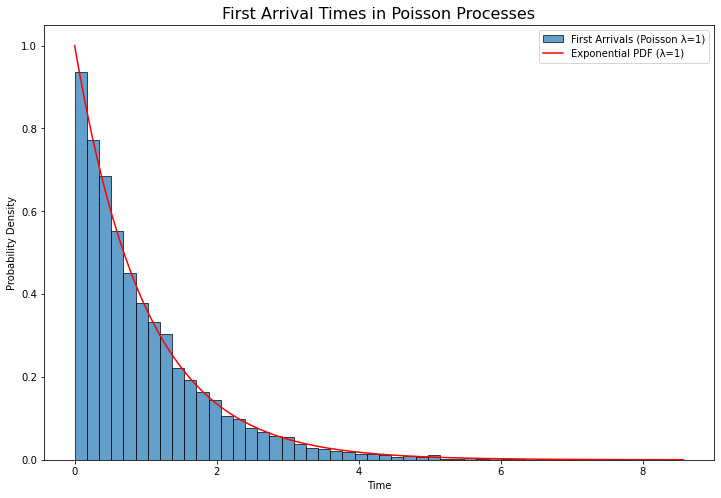

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

# Parameters
lambda_rate = 1  # Rate of the Poisson process
time_interval = 10
num_simulations = 10000

# Gathering the first arrival times by simulation
first_arrival_times = []
for _ in range(num_simulations):
    # Simulate Poisson process with rate 1
    num_events_X = np.random.poisson(lambda_rate * time_interval)
    
    # Generate random event times for X
    event_times_X = np.sort(np.random.uniform(0, time_interval, num_events_X))
    
    # Add the first arrival time to the list
    if event_times_X.size > 0:
        first_arrival_times.append(event_times_X[0])

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the histogram of first arrival times
ax.hist(first_arrival_times, bins=50, edgecolor='black', alpha=0.7, density=True, label='First Arrivals (Poisson λ=1)')

# Plot the PDF of exponential distribution (λ=1)
x = np.linspace(0, max(first_arrival_times), 1000)
pdf_exponential = expon.pdf(x, scale=1/lambda_rate)
ax.plot(x, pdf_exponential, color='red', label='Exponential PDF (λ=1)')

# Labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Probability Density')
ax.set_title('First Arrival Times in Poisson Processes', fontsize=16)
ax.legend()

# Display the plot
plt.show()
